# Ear based identification using AlexNet

## Imports, constants and helper functions

In [1]:
from torchvision import transforms
import numpy as np
import torch
import torch.nn as nn
from data.AWEDataset import AWETestSet, AWETrainSet, AWEValSet
from feature_extractors.your_super_extractor.CNN_detector import CNNEarDetector
import cv2
import os
import matplotlib.pyplot as plt
from preprocessing.preprocess import HistogramEqualization, EdgeEnhancement, ImageSharpening

In [2]:
torch.cuda.is_available()

True

In [3]:
INPUT_SIZE = 224
BATCH_SIZE = 8
# Number of classes in train set
NUM_CLASSES = 100

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(INPUT_SIZE),
        transforms.CenterCrop(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_transforms_equalization = {
    'train': transforms.Compose([
        HistogramEqualization(),
        transforms.RandomResizedCrop(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        HistogramEqualization(),
        transforms.Resize(INPUT_SIZE),
        transforms.CenterCrop(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_transforms_edge = {
    'train': transforms.Compose([
        EdgeEnhancement(),
        transforms.RandomResizedCrop(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        EdgeEnhancement(),
        transforms.Resize(INPUT_SIZE),
        transforms.CenterCrop(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_transforms_sharpening = {
    'train': transforms.Compose([
        ImageSharpening(),
        transforms.RandomResizedCrop(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        ImageSharpening(),
        transforms.Resize(INPUT_SIZE),
        transforms.CenterCrop(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

## Perfectly detected ears

### Without preprocessing

#### Load train and val data

In [4]:
train_data = AWETrainSet(os.path.join(os.getcwd(), "data/perfectly_detected_ears"), data_transforms["train"])
val_data = AWEValSet(os.path.join(os.getcwd(), "data/perfectly_detected_ears"), data_transforms["val"])

# Create training and validation dataloaders
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4),
                   'val': torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)}

#### Train the model

In [5]:
model = CNNEarDetector(model="alexnet", num_classes=train_data.get_num_classes(), extract_features=False)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
num_epochs = 200
hist = model.train(dataloaders_dict, criterion, num_epochs=num_epochs)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Domen/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Training model on GPUs
Epoch 0/199
----------
train Loss: 4.7063 Acc: 0.0072
val Loss: 4.6125 Acc: 0.0179

Epoch 1/199
----------
train Loss: 4.6239 Acc: 0.0072
val Loss: 4.5884 Acc: 0.0119

Epoch 2/199
----------
train Loss: 4.5538 Acc: 0.0337
val Loss: 4.5652 Acc: 0.0090

Epoch 3/199
----------
train Loss: 4.4903 Acc: 0.0289
val Loss: 4.5396 Acc: 0.0209

Epoch 4/199
----------
train Loss: 4.4214 Acc: 0.0434
val Loss: 4.5035 Acc: 0.0239

Epoch 5/199
----------
train Loss: 4.3514 Acc: 0.0530
val Loss: 4.4887 Acc: 0.0448

Epoch 6/199
----------
train Loss: 4.2457 Acc: 0.0892
val Loss: 4.4467 Acc: 0.0567

Epoch 7/199
----------
train Loss: 4.1522 Acc: 0.0892
val Loss: 4.4180 Acc: 0.0478

Epoch 8/199
----------
train Loss: 4.0437 Acc: 0.0964
val Loss: 4.4012 Acc: 0.0597

Epoch 9/199
----------
train Loss: 3.9363 Acc: 0.1229
val Loss: 4.4179 Acc: 0.0627

Epoch 10/199
----------
train Loss: 3.8742 Acc: 0.1157
val Loss: 4.4231 Acc: 0.0597

Epoch 11/199
----------
train Loss: 3.7422 Acc: 0.14

In [6]:
model.save(os.getcwd(), "trained_alexnet")

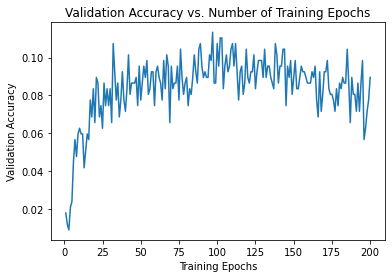

In [7]:
val_hist = [h.cpu().numpy() for h in hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1), val_hist)
plt.savefig(os.getcwd()+"/alexnet_val.png")
plt.show()

### Histogram equalization

#### Load train and val data

In [4]:
train_data = AWETrainSet(os.path.join(os.getcwd(), "data/perfectly_detected_ears"), data_transforms_equalization["train"])
val_data = AWEValSet(os.path.join(os.getcwd(), "data/perfectly_detected_ears"), data_transforms_equalization["val"])

# Create training and validation dataloaders
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4),
                   'val': torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)}

#### Train the model

In [5]:
model = CNNEarDetector(model="alexnet", num_classes=train_data.get_num_classes(), extract_features=False)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
num_epochs = 100
hist = model.train(dataloaders_dict, criterion, num_epochs=num_epochs)

Training model on GPUs
Epoch 0/99
----------
train Loss: 4.6971 Acc: 0.0072
val Loss: 4.5976 Acc: 0.0209

Epoch 1/99
----------
train Loss: 4.6469 Acc: 0.0072
val Loss: 4.5719 Acc: 0.0269

Epoch 2/99
----------
train Loss: 4.5651 Acc: 0.0145
val Loss: 4.5488 Acc: 0.0299

Epoch 3/99
----------
train Loss: 4.5233 Acc: 0.0289
val Loss: 4.5412 Acc: 0.0209

Epoch 4/99
----------
train Loss: 4.4839 Acc: 0.0265
val Loss: 4.5138 Acc: 0.0418

Epoch 5/99
----------
train Loss: 4.4025 Acc: 0.0482
val Loss: 4.5034 Acc: 0.0597

Epoch 6/99
----------
train Loss: 4.3159 Acc: 0.0723
val Loss: 4.4835 Acc: 0.0507

Epoch 7/99
----------
train Loss: 4.2250 Acc: 0.0843
val Loss: 4.4302 Acc: 0.0537

Epoch 8/99
----------
train Loss: 4.0901 Acc: 0.1012
val Loss: 4.4262 Acc: 0.0627

Epoch 9/99
----------
train Loss: 4.0647 Acc: 0.0916
val Loss: 4.4115 Acc: 0.0657

Epoch 10/99
----------
train Loss: 3.9260 Acc: 0.1133
val Loss: 4.3743 Acc: 0.0716

Epoch 11/99
----------
train Loss: 3.6862 Acc: 0.1590
val Loss:

In [6]:
model.save(os.getcwd(), "trained_alexnet_equalization")

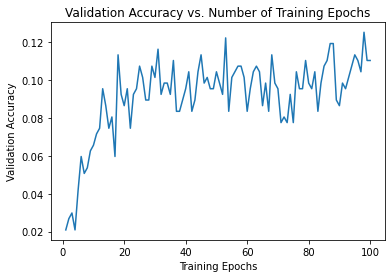

In [7]:
val_hist = [h.cpu().numpy() for h in hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1), val_hist)
plt.savefig(os.getcwd()+"/alexnet_val_equalization.png")
plt.show()

### Edge enhancement

#### Load train and val data

In [4]:
train_data = AWETrainSet(os.path.join(os.getcwd(), "data/perfectly_detected_ears"), data_transforms_edge["train"])
val_data = AWEValSet(os.path.join(os.getcwd(), "data/perfectly_detected_ears"), data_transforms_edge["val"])

# Create training and validation dataloaders
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4),
                   'val': torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)}

#### Train the model

In [5]:
model = CNNEarDetector(model="alexnet", num_classes=train_data.get_num_classes(), extract_features=False)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
num_epochs = 100
hist = model.train(dataloaders_dict, criterion, num_epochs=num_epochs)

Training model on GPUs
Epoch 0/99
----------
train Loss: 4.7469 Acc: 0.0072
val Loss: 4.6421 Acc: 0.0149

Epoch 1/99
----------
train Loss: 4.5589 Acc: 0.0145
val Loss: 4.6008 Acc: 0.0179

Epoch 2/99
----------
train Loss: 4.4603 Acc: 0.0458
val Loss: 4.5688 Acc: 0.0269

Epoch 3/99
----------
train Loss: 4.3311 Acc: 0.0578
val Loss: 4.5551 Acc: 0.0269

Epoch 4/99
----------
train Loss: 4.2150 Acc: 0.0771
val Loss: 4.5429 Acc: 0.0388

Epoch 5/99
----------
train Loss: 4.0725 Acc: 0.1060
val Loss: 4.5493 Acc: 0.0478

Epoch 6/99
----------
train Loss: 3.9006 Acc: 0.0964
val Loss: 4.5473 Acc: 0.0418

Epoch 7/99
----------
train Loss: 3.6653 Acc: 0.1422
val Loss: 4.6113 Acc: 0.0388

Epoch 8/99
----------
train Loss: 3.5171 Acc: 0.1639
val Loss: 4.6797 Acc: 0.0478

Epoch 9/99
----------
train Loss: 3.4902 Acc: 0.1614
val Loss: 4.7703 Acc: 0.0537

Epoch 10/99
----------
train Loss: 3.1993 Acc: 0.2169
val Loss: 4.8974 Acc: 0.0478

Epoch 11/99
----------
train Loss: 2.9888 Acc: 0.2482
val Loss:

In [6]:
model.save(os.getcwd(), "trained_alexnet_edge")

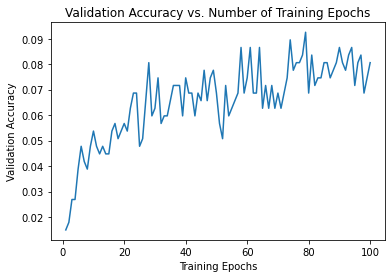

In [7]:
val_hist = [h.cpu().numpy() for h in hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1), val_hist)
plt.savefig(os.getcwd()+"/alexnet_val_edge.png")
plt.show()

### Image sharpening

#### Load train and val data

In [4]:
train_data = AWETrainSet(os.path.join(os.getcwd(), "data/perfectly_detected_ears"), data_transforms_sharpening["train"])
val_data = AWEValSet(os.path.join(os.getcwd(), "data/perfectly_detected_ears"), data_transforms_sharpening["val"])

# Create training and validation dataloaders
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4),
                   'val': torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)}

#### Train the model

In [5]:
model = CNNEarDetector(model="alexnet", num_classes=train_data.get_num_classes(), extract_features=False)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
num_epochs = 100
hist = model.train(dataloaders_dict, criterion, num_epochs=num_epochs)

Training model on GPUs
Epoch 0/99
----------
train Loss: 4.8122 Acc: 0.0024
val Loss: 4.6223 Acc: 0.0269

Epoch 1/99
----------
train Loss: 4.6047 Acc: 0.0145
val Loss: 4.5859 Acc: 0.0209

Epoch 2/99
----------
train Loss: 4.5364 Acc: 0.0241
val Loss: 4.5535 Acc: 0.0269

Epoch 3/99
----------
train Loss: 4.4392 Acc: 0.0410
val Loss: 4.5404 Acc: 0.0239

Epoch 4/99
----------
train Loss: 4.3302 Acc: 0.0434
val Loss: 4.5134 Acc: 0.0269

Epoch 5/99
----------
train Loss: 4.2214 Acc: 0.0795
val Loss: 4.4999 Acc: 0.0269

Epoch 6/99
----------
train Loss: 4.1405 Acc: 0.0747
val Loss: 4.4879 Acc: 0.0299

Epoch 7/99
----------
train Loss: 4.0228 Acc: 0.1133
val Loss: 4.4981 Acc: 0.0388

Epoch 8/99
----------
train Loss: 3.8359 Acc: 0.1277
val Loss: 4.5390 Acc: 0.0418

Epoch 9/99
----------
train Loss: 3.7088 Acc: 0.1398
val Loss: 4.5934 Acc: 0.0388

Epoch 10/99
----------
train Loss: 3.5720 Acc: 0.1614
val Loss: 4.6771 Acc: 0.0507

Epoch 11/99
----------
train Loss: 3.4188 Acc: 0.1952
val Loss:

In [6]:
model.save(os.getcwd(), "trained_alexnet_sharpening")

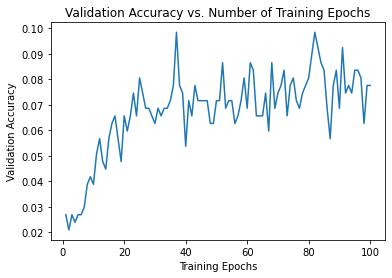

In [7]:
val_hist = [h.cpu().numpy() for h in hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1), val_hist)
plt.savefig(os.getcwd()+"/alexnet_val_sharpening.png")
plt.show()